In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df=pd.read_csv('Salary_Data.csv')
df.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

**VISUALISATION**

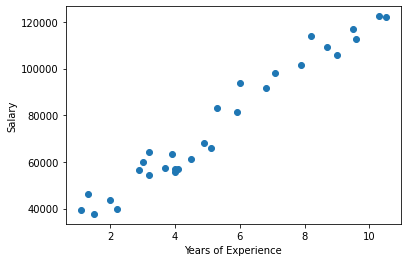

In [7]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Splitting the Data**

In [8]:
X= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [9]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [10]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [13]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=101)

In [28]:
X_train.size,X_test.size,y_train.size,y_test.size

(20, 10, 20, 10)

**LINEAR REGRESSION**

In [29]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [30]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
LR_pred = LR.predict(X_test)

In [33]:
LR_pred

array([ 91477.92796603, 109893.22802466,  56585.7804865 ,  82754.89109615,
        40108.93306562, 118616.26489454, 117647.03857567,  75001.08054514,
       112800.90698129, 125400.84912667])

In [34]:
diff = y_test-LR_pred

In [38]:
result = pd.concat([pd.Series(LR_pred),pd.Series(y_test),pd.Series(diff)],axis=1)
result.columns = ['Predicted','Initial','Difference']

In [39]:
result

Predicted   Initial   Difference
0   91477.927966   91738.0   260.072034
1  109893.228025  109431.0  -462.228025
2   56585.780487   54445.0 -2140.780487
3   82754.891096   81363.0 -1391.891096
4   40108.933066   37731.0 -2377.933066
5  118616.264895  112635.0 -5981.264895
6  117647.038576  116969.0  -678.038576
7   75001.080545   66029.0 -8972.080545
8  112800.906981  105582.0 -7218.906981
9  125400.849127  122391.0 -3009.849127

Text(0.5, 1.0, 'Salary vs Years of Experience')

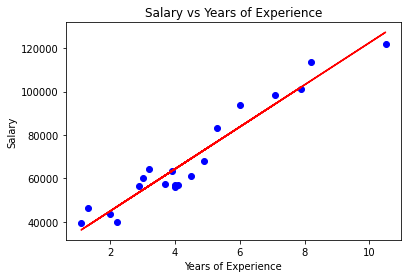

In [41]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience(Train_Data)')

Text(0.5, 1.0, 'Salary vs Years of Experience(Test_Data)')

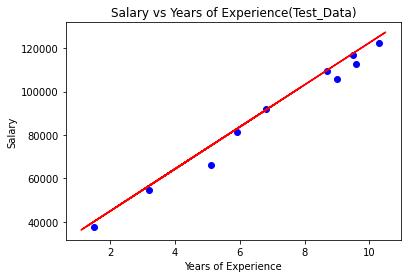

In [42]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience(Test_Data)')

**Metrics**

In [43]:
from sklearn import metrics

In [46]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,LR_pred))
R2 = metrics.r2_score(y_test,LR_pred)

In [47]:
rmse

4363.043260343273

In [48]:
R2

0.974811112371526

**DECISION TREE REGRESSOR**

In [49]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

In [50]:
DT.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [51]:
DT_pred = DT.predict(X_test)

In [52]:
DT_pred

array([ 98273., 113812.,  64445.,  93940.,  46205., 121872., 121872.,
        67938., 113812., 121872.])

In [53]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

In [56]:
diff_2 = y_test-DT_pred

In [57]:
result_2 = pd.concat([pd.Series(DT_pred),pd.Series(y_test),pd.Series(diff_2)],axis=1)
result_2.columns = ['Predicted','Initial','Difference']

In [58]:
result_2

Predicted   Initial  Difference
0    98273.0   91738.0     -6535.0
1   113812.0  109431.0     -4381.0
2    64445.0   54445.0    -10000.0
3    93940.0   81363.0    -12577.0
4    46205.0   37731.0     -8474.0
5   121872.0  112635.0     -9237.0
6   121872.0  116969.0     -4903.0
7    67938.0   66029.0     -1909.0
8   113812.0  105582.0     -8230.0
9   121872.0  122391.0       519.0

In [59]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,DT_pred))
R2 = metrics.r2_score(y_test,DT_pred)

In [60]:
rmse

7568.996703658947

In [61]:
R2

0.9241934760377903

In [62]:
from sklearn import tree

In [63]:
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_0 <= 5.10
|   |--- feature_0 <= 2.55
|   |   |--- feature_0 <= 1.20
|   |   |   |--- value: [39343.00]
|   |   |--- feature_0 >  1.20
|   |   |   |--- feature_0 <= 2.10
|   |   |   |   |--- feature_0 <= 1.65
|   |   |   |   |   |--- value: [46205.00]
|   |   |   |   |--- feature_0 >  1.65
|   |   |   |   |   |--- value: [43525.00]
|   |   |   |--- feature_0 >  2.10
|   |   |   |   |--- value: [39891.00]
|   |--- feature_0 >  2.55
|   |   |--- feature_0 <= 4.70
|   |   |   |--- feature_0 <= 3.95
|   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |--- value: [56642.00]
|   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |--- feature_0 <= 3.80
|   |   |   |   |   |   |--- feature_0 <= 3.45
|   |   |   |   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |   |   |   |--- value: [60150.00]
|   |   |   |   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |   |   |   |--- value: [64445.00]
|   |   |   |   |   |   |--- feature_0 >  3.45
|   |   |   |   |

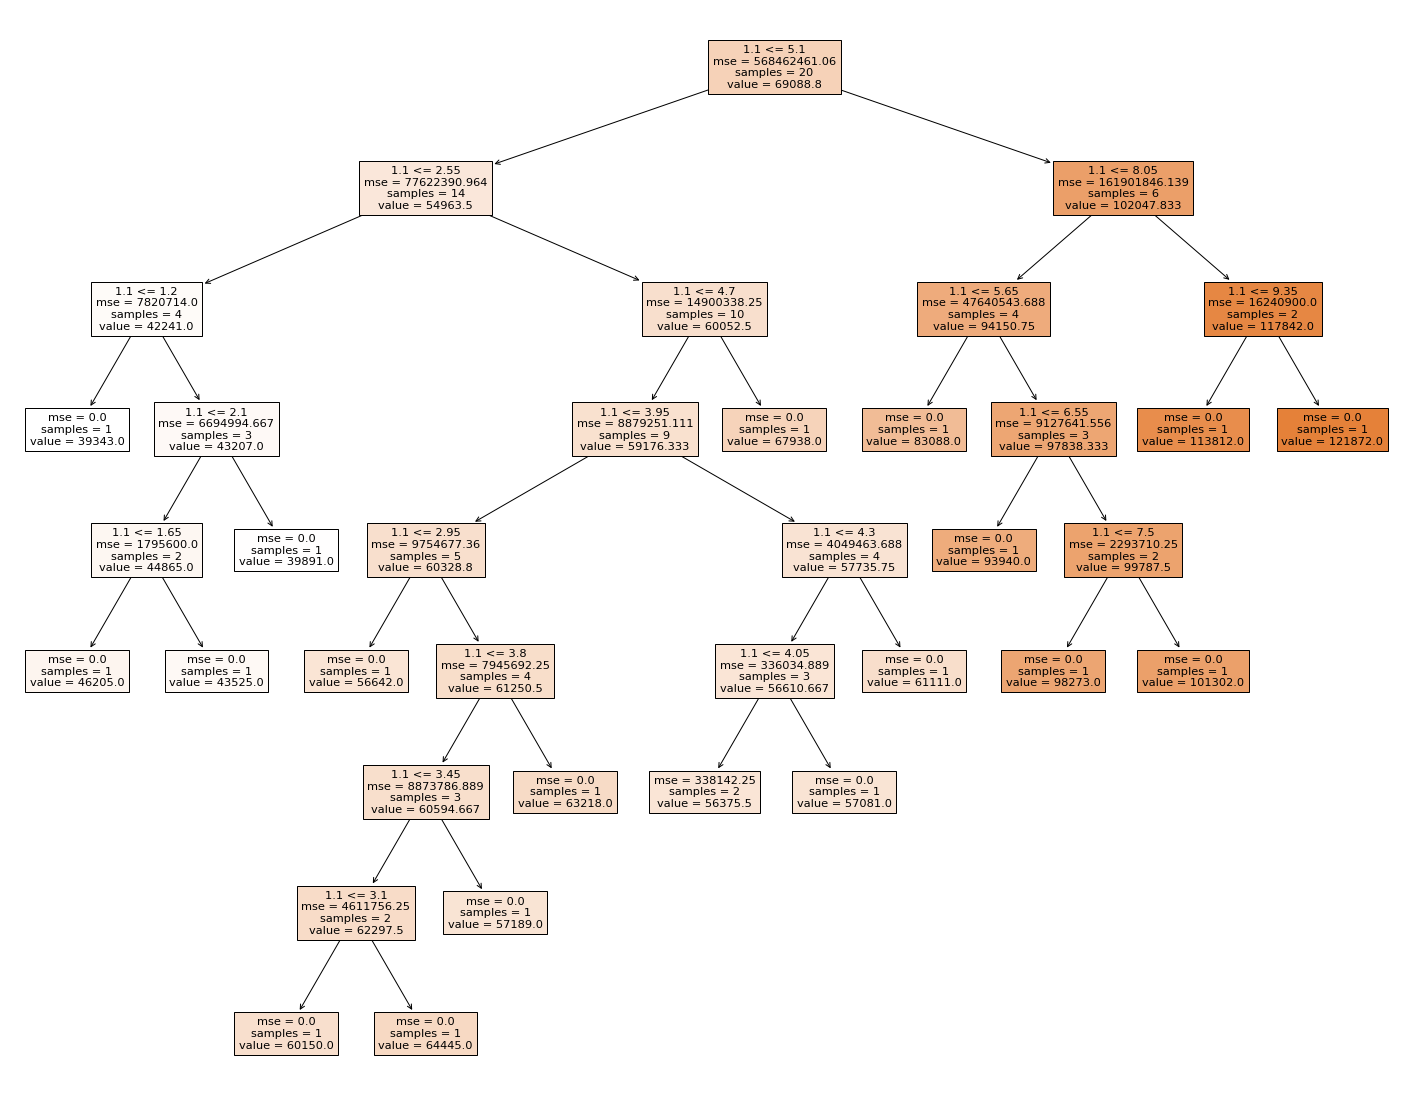

In [65]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT,feature_names=df['YearsExperience'],filled=True)